In [1]:
import cupy as cp
from cupyx.scipy.special import erfinv
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfinv as sp_erfinv

x_gpu = cp.random.rand(20) # input array
x_cpu = cp.asnumpy(x_gpu)
x_gpu

array([0.55524998, 0.42394212, 0.01200076, 0.13974612, 0.74289723,
       0.19072088, 0.47061846, 0.61921186, 0.96994115, 0.44076614,
       0.04326316, 0.33698309, 0.47978816, 0.00819107, 0.63463167,
       0.03370001, 0.0369827 , 0.84651929, 0.25335235, 0.75172228])

In [2]:
r_gpu = x_gpu.argsort().argsort() # compute the rank
print(r_gpu)

r_cpu = x_cpu.argsort().argsort() 
print(r_cpu)

[13  9  1  5 16  6 11 14 19 10  4  8 12  0 15  2  3 18  7 17]
[13  9  1  5 16  6 11 14 19 10  4  8 12  0 15  2  3 18  7 17]


In [3]:
r_gpu = (r_gpu/r_gpu.max()-0.5)*2 # scale to (-1,1)
epsilon = 1e-6
r_gpu = cp.clip(r_gpu,-1+epsilon,1-epsilon)
print(r_gpu)

r_cpu = (r_cpu/r_cpu.max()-0.5)*2 # scale to (-1,1)
r_cpu = cp.clip(r_cpu,-1+epsilon,1-epsilon)
print(r_cpu)

[ 0.36842105 -0.05263158 -0.89473684 -0.47368421  0.68421053 -0.36842105
  0.15789474  0.47368421  0.999999    0.05263158 -0.57894737 -0.15789474
  0.26315789 -0.999999    0.57894737 -0.78947368 -0.68421053  0.89473684
 -0.26315789  0.78947368]
[ 0.36842105 -0.05263158 -0.89473684 -0.47368421  0.68421053 -0.36842105
  0.15789474  0.47368421  0.999999    0.05263158 -0.57894737 -0.15789474
  0.26315789 -0.999999    0.57894737 -0.78947368 -0.68421053  0.89473684
 -0.26315789  0.78947368]


In [4]:
r_gpu = erfinv(r_gpu) # map to gaussian
print(r_gpu)

r_cpu = sp_erfinv(r_cpu) # map to gaussian
print(r_cpu)

[ 0.3390617  -0.0466774  -1.14541135 -0.44805114  0.70933273 -0.3390617
  0.14085661  0.44805114  3.45891074  0.0466774  -0.56893556 -0.14085661
  0.23761485 -3.45891074  0.56893556 -0.8853822  -0.70933273  1.14541135
 -0.23761485  0.8853822 ]
[ 0.3390617  -0.0466774  -1.14541135 -0.44805114  0.70933273 -0.3390617
  0.14085661  0.44805114  3.45891074  0.0466774  -0.56893556 -0.14085661
  0.23761485 -3.45891074  0.56893556 -0.8853822  -0.70933273  1.14541135
 -0.23761485  0.8853822 ]


GaussRank transformation


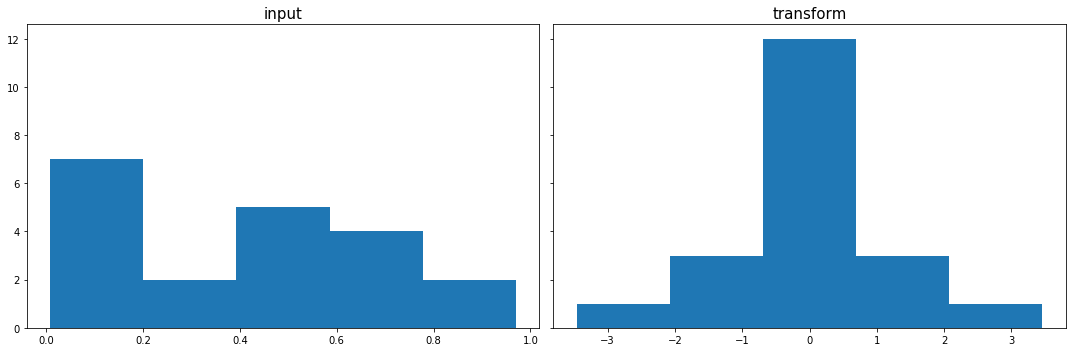

In [5]:
n_bins = 5
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
axs[0].hist(cp.asnumpy(x_gpu), bins=n_bins)
axs[0].set_title('input',fontsize=15)
axs[1].hist(cp.asnumpy(r_gpu), bins=n_bins)
axs[1].set_title('transform',fontsize=15)
print('GaussRank transformation GPU')

GaussRank transformation CPU


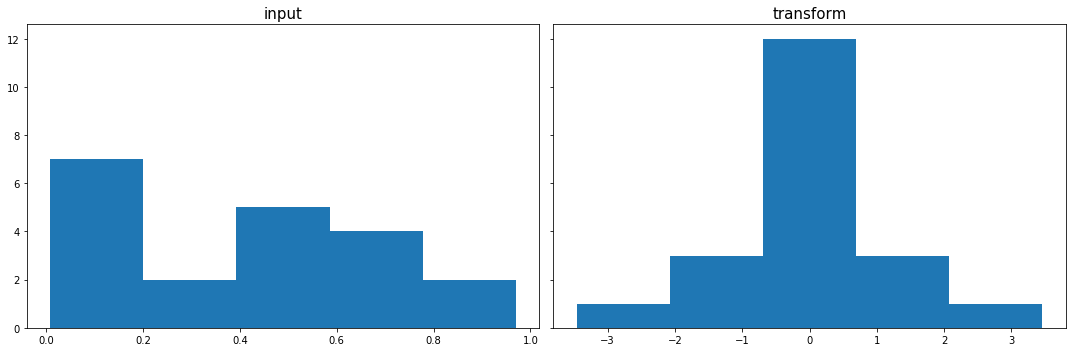

In [6]:
n_bins = 5
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
axs[0].hist(x_cpu, bins=n_bins)
axs[0].set_title('input',fontsize=15)
axs[1].hist(r_cpu, bins=n_bins)
axs[1].set_title('transform',fontsize=15)
print('GaussRank transformation CPU')